In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Life-Expectancy-Data-Updated.csv"  # Replace with the actual file path

life_expectancy_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lashagoch/life-expectancy-who-updated",
    file_path,
    pandas_kwargs={'encoding': 'ISO-8859-1'}  # Or use 'latin1' if needed
)

C:\Users\krist\AppData\Local\Temp\ipykernel_10500\2468902236.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  life_expectancy_df = kagglehub.load_dataset(


# Introduction
## The Data
This is WHO data on a variety of health metrics, demographic data, and country information for the years 2000-2015 for 193 countries worldwide. The primary 'dependent variable' is the life expectancy of each country for each year; every other column should contribute to that value in some way, and thereby be useful in predicting life expectancy. The columns of data fall broadly into the following categories:

### Health data:
+ Adult Mortality- Probability of dying age 15-60, per 1000 people
+ Infant deaths- Deaths under 2-years per 1000
+ Alcohol- Per capita (age 15+) consumption in liters
+ Hepatitus B- HepB immunization coverage among 1-year-olds
+ Measles- Reported cases per 1000
+ BMI- Average body mass index for population
+ Under-5 deaths- Deaths of those younger than 5, per 1000
+ Polio- Immunization coverage for Polio for 1-year-olds
+ Diptheria- Immunization coverage for Dipheria for 1-year-olds
+ Incident HIV- Deaths from HIV/AIDS 15-49 years, per 1000
+ Thinness 10-19 years- Proportion of thinness in children age 10-19 (BMI 2+ standard deviations from the mean)
+ Thinness 5-9 years- Proportion of thinness in children age 5-9 (BMI 2+ standard deviations from the mean)
### Financial data:
+ Percentage expenditure- Percentage of GDP spent on healthcare
+ Total expenditure- Percentage of total government spending on healthcare
+ Income composition (ICR)- Human Development Index in terms of income composition of resources. Measures the diversity of a country's capital-generating industries.
+ GDP per capita- Gross domestic product divided by population
### Country information:
+ Status developed- Developed status (1 = True, 0 = False)
+ Status developing- Developing status (1 = True, 0 = False)
+ Schooling- Average years of formal school attended, age 25
+ Population- Country population in millions
+ Country- Country name
+ Year- Year the data is from
+ Region- Geographic location in the world

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(f'Rows: {life_expectancy_df.shape[0]}\nColumns: {life_expectancy_df.shape[1]}')
life_expectancy_df.head()

Rows: 2864
Columns: 21


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
missing_df = pd.DataFrame({
    "column_name": life_expectancy_df.isna().sum().keys(),
    "number_missing_values": life_expectancy_df.isna().sum().values
})

missing_df

,column_name,number_missing_values
0,Country,0
1,Region,0
2,Year,0
3,Infant_deaths,0
4,Under_five_deaths,0
5,Adult_mortality,0
6,Alcohol_consumption,0
7,Hepatitis_B,0
8,Measles,0
9,BMI,0


In [5]:
life_expectancy_df.describe(include='all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,...,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,...,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,...,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,...,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,...,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,...,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000


### Feature Engineering

In [6]:
life_expectancy_df['Population_category'] = life_expectancy_df['Population_mln'].apply(
    lambda x:
        'High' if x > 120.0
        else 'Medium' if x > 50.0
        else 'Low'
)

In [7]:
life_expectancy_df['Schooling_category'] = life_expectancy_df['Schooling'].apply(
    lambda x:
        'High Education' if x > 7.0
        else 'Medium Education' if x > 4.0
        else 'Low Education'
)

In [8]:
life_expectancy_df['Life_expectancy_category'] = life_expectancy_df['Life_expectancy'].apply(
    lambda x:
        'High Life Expectancy' if x > 75.0
        else 'Medium Life Expectancy' if x > 60.0
        else 'Low Life Expectancy'
)  

In [23]:
country_rename_map = {
    'United States': 'USA',
    'United Kingdom': 'UK',
    'United Arab Emirates': 'UAE'
}

life_expectancy_df['Country'] = life_expectancy_df['Country'].replace(country_rename_map)

In [24]:
life_expectancy_df['Country'].unique()

array(['Turkiye', 'Spain', 'India', 'Guyana', 'Israel', 'Costa Rica',
       'Russian Federation', 'Hungary', 'Jordan', 'Moldova', 'Brazil',
       'Malta', 'Bahamas, The', 'Ukraine', 'Switzerland', 'Norway',
       'Finland', 'Comoros', 'Japan', 'Gabon', 'Ghana', 'Philippines',
       'Congo, Rep.', 'Madagascar', 'Estonia', 'Belize', 'Kazakhstan',
       'Cameroon', 'Zimbabwe', 'Bhutan', 'South Africa', 'Eritrea',
       'Germany', 'Saudi Arabia', 'Kiribati', 'Seychelles', 'Singapore',
       'Togo', 'Denmark', 'Gambia, The', 'Sweden', 'Austria',
       'Kyrgyz Republic', 'Grenada', 'Brunei Darussalam', 'Greece',
       'Uruguay', 'Croatia', 'Romania', 'Central African Republic',
       'Algeria', 'Yemen, Rep.', 'Armenia',
       'St. Vincent and the Grenadines', 'Kenya', 'Micronesia, Fed. Sts.',
       'Antigua and Barbuda', 'Nepal', 'Lithuania', 'Vanuatu',
       'Afghanistan', 'Kuwait', 'Argentina', 'Panama', 'Oman', 'France',
       'Bosnia and Herzegovina', 'Mauritania', 'Somalia

### Analisis

In [11]:
# Filter for the year 2015
df_2015 = life_expectancy_df[life_expectancy_df['Year'] == 2015]

# Define your custom order
custom_order = ['High Education', 'Medium Education', 'Low Education'] 

# Group by Schooling_category and count unique countries
category_counts = (
    df_2015.groupby('Schooling_category')['Country']
    .nunique()
    .reindex(custom_order))

print(category_counts)

Schooling_category
High Education      114
Medium Education     46
Low Education        19
Name: Country, dtype: int64


In [12]:
data_types_df = pd.DataFrame({
    "column_name": life_expectancy_df.dtypes.index,
    "data_type": life_expectancy_df.dtypes.values
})

data_types_df

,column_name,data_type
0,Country,object
1,Region,object
2,Year,int64
3,Infant_deaths,float64
4,Under_five_deaths,float64
5,Adult_mortality,float64
6,Alcohol_consumption,float64
7,Hepatitis_B,int64
8,Measles,int64
9,BMI,float64


In [13]:
life_expectancy_df['Economy_status_Developed'] = life_expectancy_df['Economy_status_Developed'].astype('bool')
life_expectancy_df['Economy_status_Developing'] = life_expectancy_df['Economy_status_Developing'].astype('bool')

In [14]:
# Initialize an empty list to store the results
country_occurences = []

for country in life_expectancy_df['Country'].unique():
    count = life_expectancy_df[life_expectancy_df['Country'] == country].shape[0]
    country_occurences.append({"country": country, "occurences": count})
    
country_occurences_df = pd.DataFrame(country_occurences)

# Check if all countries appear 16 times
if (country_occurences_df['occurences'] != 16).any():
    print(country_occurences_df)  # Print the DataFrame if any country doesn't appear 16 times
else:
    print("All countries appear 16 times")

All countries appear 16 times


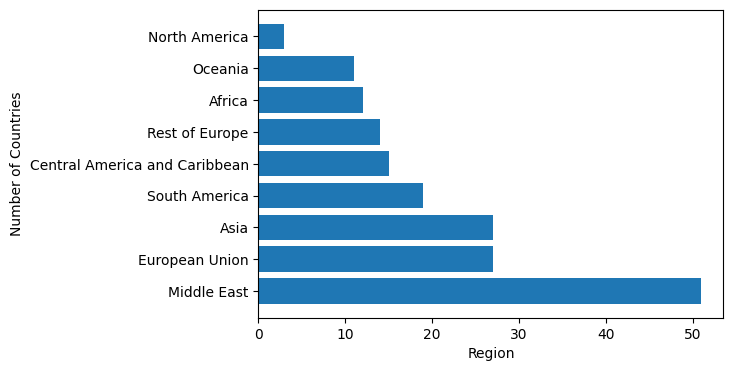

In [15]:
regions = life_expectancy_df['Region'].unique()
region_counts = (life_expectancy_df['Region'].value_counts() / country_occurences_df['occurences'].unique().astype('int32')).astype('int32')

plt.figure(figsize=(6,4))
ax = plt.subplot()

plt.barh(regions, region_counts)
plt.xlabel("Region")
plt.ylabel("Number of Countries")

plt.show()

In [16]:
class CountryComparator:
    
    def __init__(self, dataframe):
        
        """
        Initializes the CountryComparator with a DataFrame.

        Parameters:
        -----------
        dataframe : pd.DataFrame
            A DataFrame that must contain at least 'Country', 'Year', and numeric columns
            to be compared across countries.
        """
        self.life_expectancy_df = dataframe
        
    def show_available_colums(self):
        """
        Prints the available column names in the dataset for reference.
        """
        print("Available columns:")
        for col in self.life_expectancy_df.columns: 
            print(f'- {col}')
    
    @staticmethod
    def validate_columns(df, required_columns):
        """
        Checks if all required columns are present in the DataFrame.
        """
        missing = [col for col in required_columns if col not in df.columns]
        if missing:
            return f"Missing columns: {', '.join(missing)}"
        return "All required columns are present."
    
    def plot_life_expectancy_by_country(self, countryName):

        list_countries = life_expectancy_df['Country'].unique() # Get all valid countries
        
        if isinstance(countryName, str) and countryName in list_countries:
            life_expectancy_by_country = (
                life_expectancy_df[life_expectancy_df['Country'] == countryName]
                [['Region', 'Year', 'Life_expectancy']]
                .sort_values(by='Year'))
            
            plt.plot(life_expectancy_by_country['Year'], life_expectancy_by_country['Life_expectancy'], color='g')
            plt.title(f'Life expectancy of {countryName} over time')
            plt.xlabel('Year')
            plt.ylabel('Life expectancy by year')
            plt.show()
        else:
            print('Please enter a valid country')
        
        
    def compare_life_expectancy_between_countries(self, *countryNames):
        list_countries = life_expectancy_df['Country'].unique()

        # If no country names are passed
        if not countryNames:
            print("Please provide at least one country name.")
            return

        plt.figure(figsize=(10, 6))

        for country in countryNames:
            if isinstance(country, str) and country in list_countries:
                df_country = (
                    life_expectancy_df[life_expectancy_df['Country'] == country]
                    [['Year', 'Life_expectancy']]
                    .sort_values(by='Year')
                )
                plt.plot(df_country['Year'], df_country['Life_expectancy'], label=country)
            else:
                print(f"'{country}' is not a valid country name and will be skipped.")

        plt.title("Life Expectancy Comparison")
        plt.xlabel("Year")
        plt.ylabel("Life Expectancy")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def compare_countries(self, *countryNames, columns=None):
        """
        Plots time series comparisons of one or more variables for specified countries.

        Parameters:
        -----------
        *countryNames : str
            Variable-length list of country names to include in the comparison.
            Must match the country names in the 'Country' column of `life_expectancy_df`.

        columns : str or list of str
            One or more column names from `life_expectancy_df` to plot.
            Each column will be plotted in a separate figure with country-level comparisons.

        Functionality:
        --------------
        - For each specified variable in `columns`, a separate line chart is generated.
        - Each chart compares the variable over time (`Year`) for the given countries.
        - Invalid country or column names are skipped with a warning message.

        Notes:
        ------
        - Assumes `life_expectancy_df` is a DataFrame available in the global scope,
        containing at least the columns: 'Country', 'Year', and the variables listed in `columns`.
        - Uses matplotlib to display plots.
        """
        
        list_countries = life_expectancy_df['Country'].unique()
        valid_columns = life_expectancy_df.columns

        if not countryNames:
            print("Please provide at least one country name.")
            return
        if columns is None:
            print("Please provide at least one column name to compare the countries against.")
            return

        # If a single column is passed as string, convert it to list
        if isinstance(columns, str):
            columns = [columns]

        for col in columns:
            if col not in valid_columns:
                print(f"'{col}' is not a valid column name and will be skipped.")
                continue

            plt.figure(figsize=(10, 6))  # Create a new figure for each column

            for country in countryNames:
                if isinstance(country, str) and country in list_countries:
                    df_country = (
                        life_expectancy_df[life_expectancy_df['Country'] == country]
                        .sort_values(by='Year')
                    )
                    plt.plot(df_country['Year'], df_country[col], label=country)
                else:
                    print(f"'{country}' is not a valid country name and will be skipped.")

            plt.title(f"{col} Comparison")
            plt.xlabel("Year")
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

In [17]:
countryComparator = CountryComparator(life_expectancy_df) # Instantiate the class

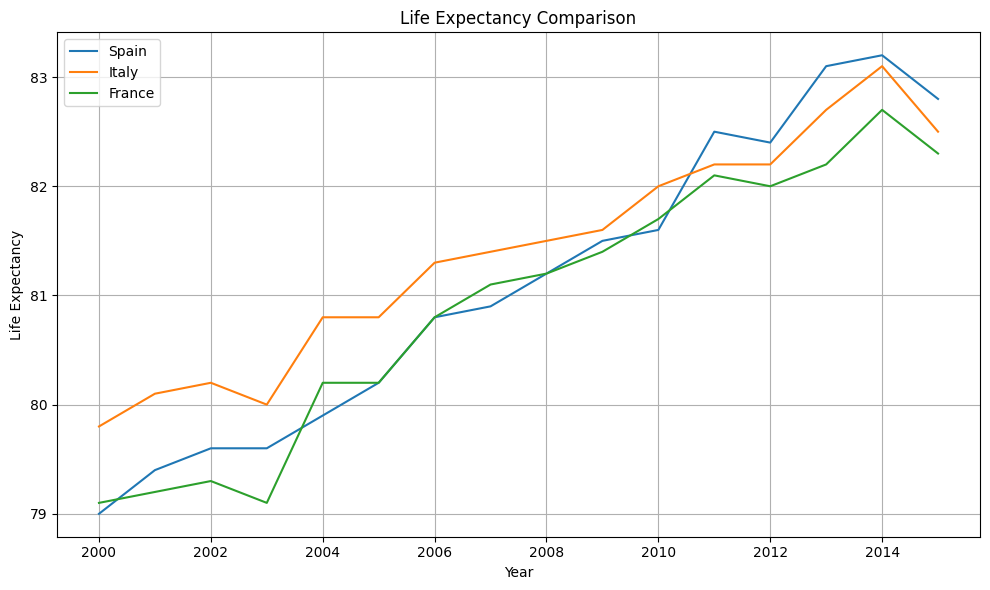

In [18]:
# Method to compare the life expectancy between several countries
countryComparator.compare_life_expectancy_between_countries('Spain', 'Italy', 'France') 

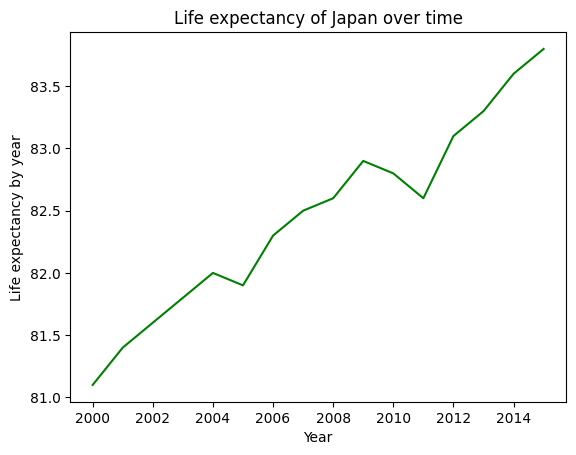

In [19]:
# Plot the life expectancy of 1 country
countryComparator.plot_life_expectancy_by_country('Japan')

In [20]:
countryComparator.show_available_colums()

Available columns:
- Country
- Region
- Year
- Infant_deaths
- Under_five_deaths
- Adult_mortality
- Alcohol_consumption
- Hepatitis_B
- Measles
- BMI
- Polio
- Diphtheria
- Incidents_HIV
- GDP_per_capita
- Population_mln
- Thinness_ten_nineteen_years
- Thinness_five_nine_years
- Schooling
- Economy_status_Developed
- Economy_status_Developing
- Life_expectancy
- Population_category
- Schooling_category
- Life_expectancy_category


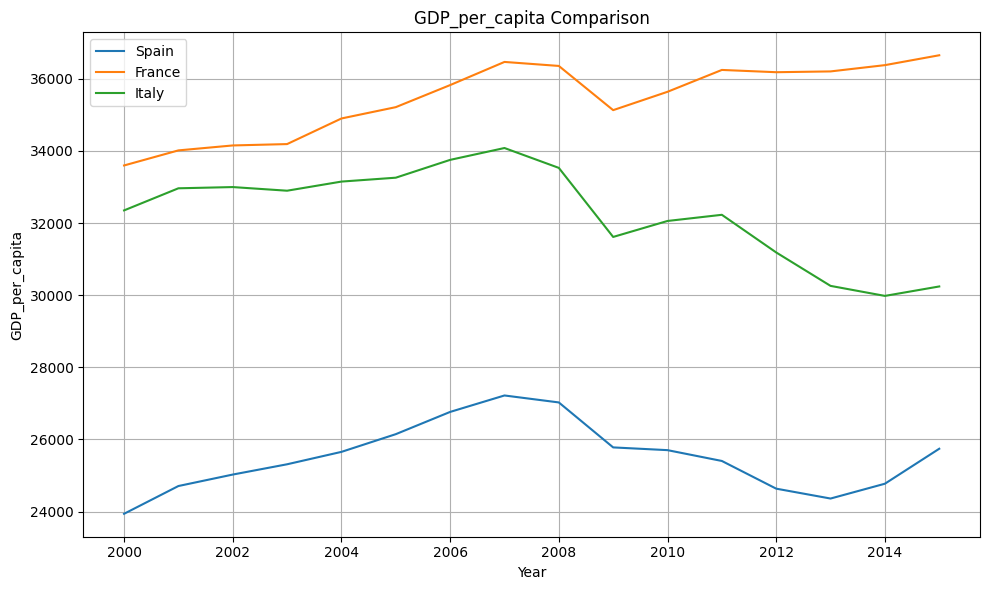

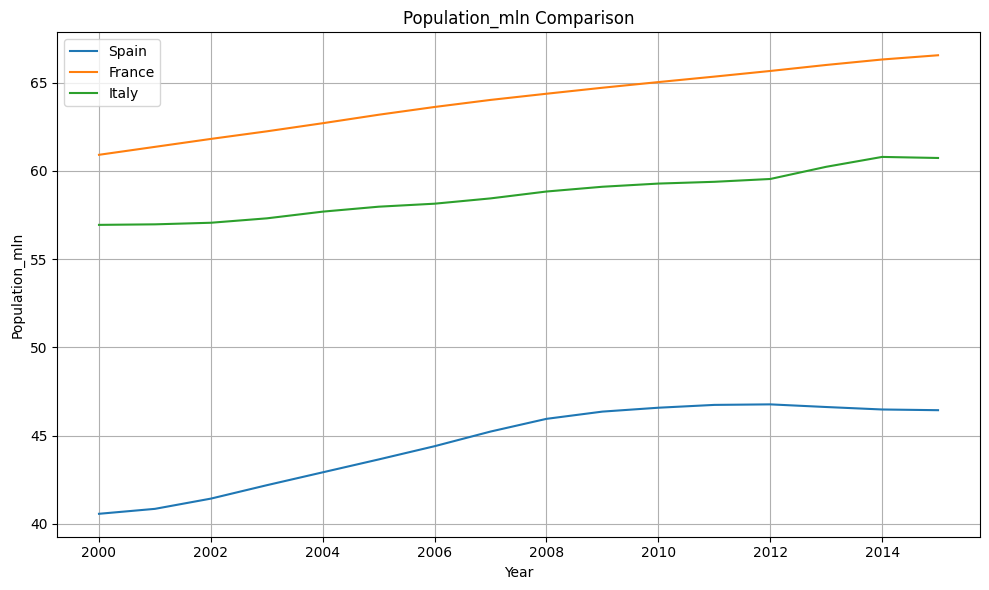

In [21]:
countryComparator.compare_countries('Spain', 'France', 'Italy', columns=['GDP_per_capita', 'Population_mln'])

In [22]:
msg_cols = CountryComparator.validate_columns(life_expectancy_df, ['Schooling', 'GDP_per_capita', 'Test_column'])
msg_cols

'Missing columns: Test_column'

### Statistical Analysis - Association of Variables 

# Anova
# Chi2 Square
# T-test